### 선형회귀 모델
- 입력특성에 대한 선형함수를 만들어 예측을 수행하는 모델
- 단순선형회귀 공식 => y = wx + b
- 다중선형회귀 공식 => y = w1 * x1 + w2 * x2 + b

#### 샘플데이터 생성

In [3]:
import pandas as pd

In [4]:
sample_data = pd.DataFrame([[9,90],[8,80],[4,40],[2,20]],
                          columns=['공부시간','성적'],
                          index=['해도','영화','자연','병관'])
sample_data

,공부시간,성적
해도,9,90
영화,8,80
자연,4,40
병관,2,20


In [5]:
# 입력특성(문제)
X = sample_data["공부시간"]
# 정답
y = sample_data['성적']

#### 모델링을 위한 sklearn 패키지 활용
- 머신러닝 학습을 위한 모델, 평가지표, 학습용 데이터셋 등을 가지고 있는 파이썬 패키지

In [7]:
# 전통적인 선형회귀 모델을 구현한 클래스
from sklearn.linear_model import LinearRegression as LR

##### 모델링 순서
1. 모델객체 생성
2. 문제/정답 학습
3. 모델평가
4. 모델예측

In [9]:
score_model = LR() # 선형회귀모델 객체생성

In [10]:
# 문제와 정답 입력
score_model.fit(X.values.reshape(-1,1) # 1차원 데이터를 2차원으로 변경
                ,y)
# 행렬개념이 없는 1차원데이터를 4행 1열 데이터로 reshape

LinearRegression()

In [11]:
score_model.predict([[7],[5]]) # 예측하고 싶은 입력데이터만 작성

array([70., 50.])

In [12]:
# 학습된 가중치와 절편 확인
print("가중치 : ", score_model.coef_)
print("절편 : ", score_model.intercept_)

가중치 :  [10.]
절편 :  -7.105427357601002e-15


#### 다중선형회귀
- 입력특성이 2개 이상인 선형회귀 모델

In [14]:
sample_data['게임시간'] = [2,5,8,15]
sample_data

,공부시간,성적,게임시간
해도,9,90,2
영화,8,80,5
자연,4,40,8
병관,2,20,15


In [15]:
# 입력특성(문제)
XX = sample_data[['공부시간','게임시간']]
# 정답
yy = sample_data['성적']

모델생성 -> 모델학습 -> 모델평가(생략) -> 모델예측 -> 가중치,절편확인

In [17]:
# 모델생성 및 함수
score_model2 = LR()
score_model2.fit(XX,yy)

LinearRegression()

In [18]:
score_model2.predict([[7,10],[4,1]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70., 40.])

In [19]:
#가중치와 절편 확인
print("가중치 : ", score_model2.coef_)
print("절편 : ", score_model2.intercept_)

가중치 :  [ 1.00000000e+01 -3.09810793e-15]
절편 :  2.842170943040401e-14


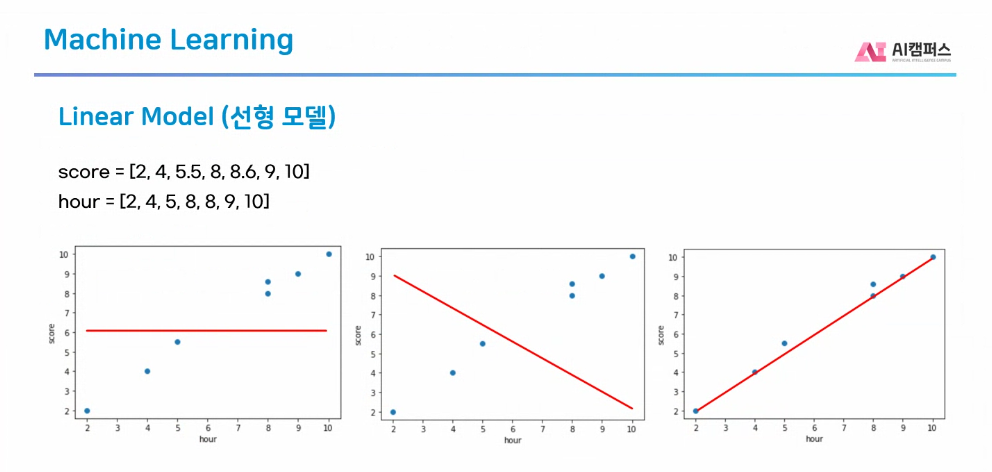

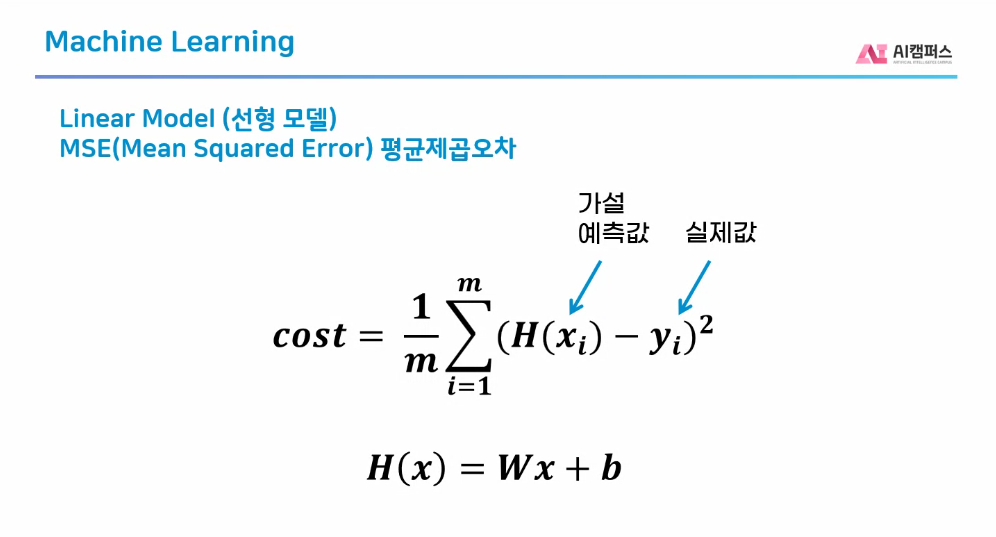

#### 평균제곱오차 구현하기(Mean Squared Error)
- 선형회귀 모델이 학습하는 과정 또는 결과에 대해서 잘못되었는지 잘되었는지 파악하는 지표로 사용하는 알고리즘
- MSE같은 알고리즘을 비용함수(Cost funtion)이라고 부른다
- 생성모델, 자연어처리 모델 등 각 모델에 맞는 비용함수가 구성되어있다.

In [73]:
def H(X,w) :
    '''
        X : 가설함수로 입력되는 데이터(문제)
        w : 가설함수에서 지정하는 가중치
        retrun 값 : 입력데이터와 가중치의 곱셈 값
    '''
    return X*w

In [83]:
y_pre = H(sample_data['공부시간'],10)
y_pre

해도    90
영화    80
자연    40
병관    20
Name: 공부시간, dtype: int64

In [89]:
# 평균제곱 오차함수 만들기
def MSE(X,y,w):
    '''

        X : MSE오차를 계산하기 위한 입력데이터(문제)
        y : 실제 정답 값
        w : 가설함수에 적용할 가중치 값
    '''
    # 예측 값
    y_pre = H(X,w)
    # 오차 구하기
    error = y_pre - y
    # 오차의 제곱
    squared_error = error**2
    return squared_error.mean()



In [111]:
MSE(sample_data['공부시간'], sample_data['성적'], 10)

0.0

##### 평균제곱오차 그래프 그려보기
- 최적의 가중치를 가지면 MSE는 최소값을 지닌다.
- 최적의 가중치를 벗어나기 시작하면 MSE는 제곱으로 급격히 증가한다.

In [114]:
w_list = range(0,21)

In [116]:
cost_list = [MSE(sample_data['공부시간'], sample_data['성적'], w) for w in w_list]

In [120]:
cost_list

[4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0]

In [122]:
import matplotlib.pyplot as plt

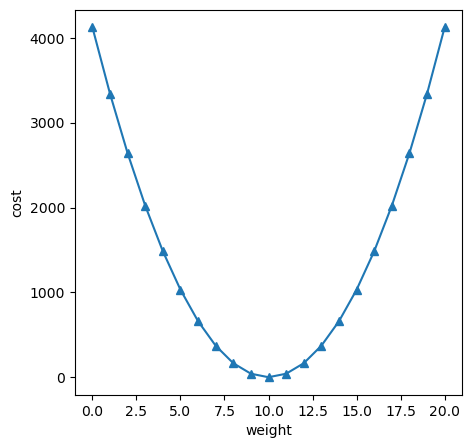

In [136]:
plt.figure(figsize=(5,5)) # 그림 사이즈 설정
plt.plot(range(0,21), # x축 데이터
        cost_list, # y축 데이터
        marker='^'
        )
plt.xlabel('weight')
plt.ylabel('cost')
plt.show()